<p style="font-family: Arial; font-size:3.35em;color:purple; font-style:bold"><br>
Most Rated Genres</p><br>
<hr>

## IMDB Movie Dataset
The data are contained in six files `links.csv`, `movies.csv`, `ratings.csv` and `tags.csv` etc.In this project we will use only two given data set which is **movies.csv** and **ratings.csv**. Our research question is **What types of movies genres user viewed and rated most than other movies genres ?**


DataSet can be get from this site : <http://grouplens.org/datasets/>

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Importing Pandas

<br> </p>

In [1]:
import pandas as pd 
%matplotlib inline

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Importing or Acquiring <strong>movies.csv</strong> and <strong>ratings.csv</strong> data sets

<br> </p>

In [ ]:
movies = pd.read_csv('/home/roshan/Documents/datascience/edX/PythonForDataScience/ml-25m/movies.csv',sep = ',')
ratings = pd.read_csv('/home/roshan/Documents/datascience/edX/PythonForDataScience/ml-25m/ratings.csv',sep = ',')

In [3]:
movies.head() # showing the first 15 items in csv file

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head(5) # showing the first 15 items in csv file

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [5]:
# deleting the timestamp and userId coloumns
del ratings['timestamp'] 
del ratings['userId']

In [6]:
ratings.head() # after

,movieId,rating
0,296,5.0
1,306,3.5
2,307,5.0
3,665,5.0
4,899,3.5


<h1 style="font-size:2em;color:#2467C0">Merge Dataframes</h1>
<hr>

In [7]:
# take the average ratings value and group them by concern MovieId ....
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
avg_ratings.head()

,movieId,rating
0,1,3.893708
1,2,3.251527
2,3,3.142028
3,4,2.853547
4,5,3.058434


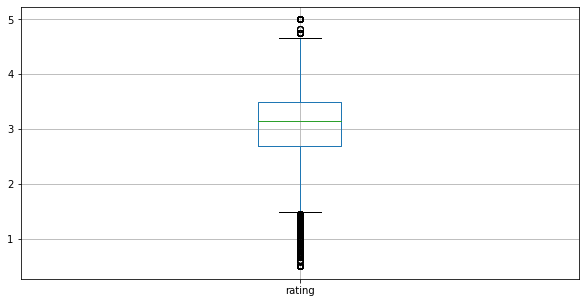

In [8]:
# we can visualize ratings values by box ploting
avg_ratings.boxplot(column='rating',figsize=(10,5))

        Fig : Visualize Rating in Box Plot

In [9]:
# extract the launching year of each movies and make a new columns named year
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)
movies.tail()

,movieId,title,genres,year
62418,209157,We (2018),Drama,2018
62419,209159,Window of the Soul (2001),Documentary,2001
62420,209163,Bad Poems (2018),Comedy|Drama,2018
62421,209169,A Girl Thing (2001),(no genres listed),2001
62422,209171,Women of Devil's Island (1962),Action|Adventure|Drama,1962


<p style="font-family: Arial; font-size:1.55em;color:#382196; font-style:bold"><br>
Merge the previous <b>avg_ratings</b> and <b>movies</b> data set<br><hr>

In [10]:
#  merging....
join_datasets = movies.merge(avg_ratings, on='movieId', how='inner')
join_datasets.tail()

,movieId,title,genres,year,rating
59042,209157,We (2018),Drama,2018,1.5
59043,209159,Window of the Soul (2001),Documentary,2001,3.0
59044,209163,Bad Poems (2018),Comedy|Drama,2018,4.5
59045,209169,A Girl Thing (2001),(no genres listed),2001,3.0
59046,209171,Women of Devil's Island (1962),Action|Adventure|Drama,1962,3.0


In [11]:
join_datasets.columns # coloumn in new data set

Index(['movieId', 'title', 'genres', 'year', 'rating'], dtype='object')

In [12]:
# get rid of the title column
del join_datasets['title']

In [13]:
join_datasets.head()

,movieId,genres,year,rating
0,1,Adventure|Animation|Children|Comedy|Fantasy,1995,3.893708
1,2,Adventure|Children|Fantasy,1995,3.251527
2,3,Comedy|Romance,1995,3.142028
3,4,Comedy|Drama|Romance,1995,2.853547
4,5,Comedy,1995,3.058434


<h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1>
<hr>

In [14]:
# Find the shape of the join data set
join_datasets.shape

(59047, 4)

In [15]:
# check is there any null value , if so , true boolean value will be return
join_datasets.isnull().any()

movieId    False
genres     False
year        True
rating     False
dtype: bool

Hmm , there're some null value , we have to drop them out.

In [16]:
# dropna () is used to drop out the null values
join_datasets = join_datasets.dropna()

In [17]:
# again check the shape of the data sets , these time row number decrease 
# indcating some rows are erased as they hold null values
join_datasets.shape

(58678, 4)

In [18]:
# again check is their any null values
join_datasets.isnull().any()

movieId    False
genres     False
year       False
rating     False
dtype: bool

hmm , all null values are gone.It's Ok now.

<h1 style="font-size:2em;color:#2467C0">Data Visualization</h1>
<hr>

### Comparing Genres VS Ratings value , to see the correlation plot in following. We will use general ploting diagram to visualize it ,where genres is alone X axes and ratings is along Y axes.

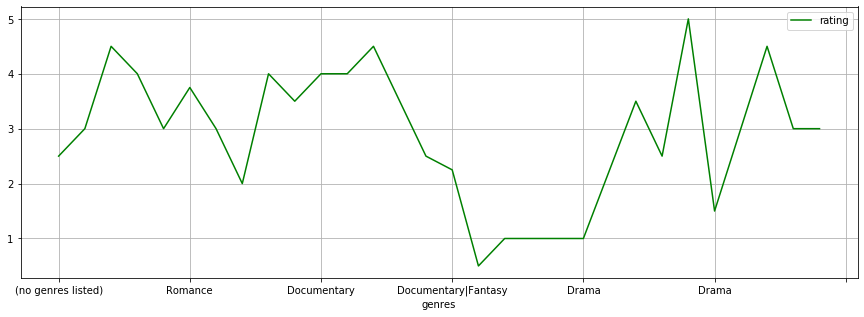

In [20]:
join_datasets[-30:].plot(x='genres', y='rating', figsize=(15,5), grid=True , color ='g')

    Fig : Ploting ratings VS genres . Drama genres tend to high than other movie genres
    
    

<p style="font-family: Arial; font-size:1.55em;color:#382196; font-style:bold"><br>
Comments On Plot<br><hr></p>Here we can see , ploting **genres** and **ratings** values shows us that Drama type movies tends to rate more high than other movies genres.Other genres has average ratinsgs scale though comedy genres is following Drama genres.

### For making to visualize more convineint , let's use pie plot.

In [21]:
# using value_counts() on our join_datasets , we can also see Drama movies are majority in numbers>
gen_count = join_datasets['genres'].value_counts()
gen_count[:10]

Drama                   8621
Comedy                  5283
Documentary             4571
(no genres listed)      4325
Comedy|Drama            2308
Drama|Romance           2004
Horror                  1549
Comedy|Romance          1460
Comedy|Drama|Romance    1014
Drama|Thriller           893
Name: genres, dtype: int64

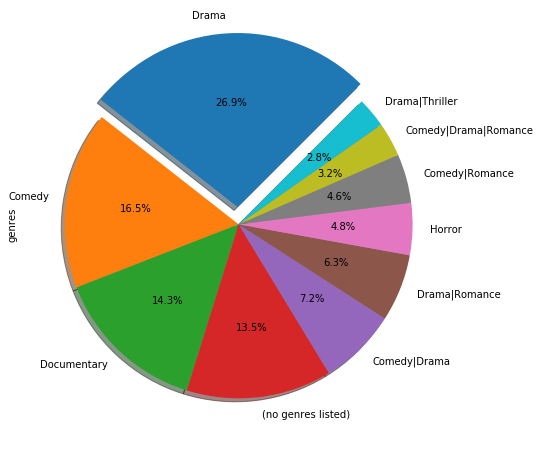

In [22]:
# plot the most frequent genres
gen_count[:10].plot(
                    kind = 'pie', figsize=(10,8) , shadow = True,
                    explode =(0.1,0,0,0,0,0,0,0,0,0), 
                    autopct = '%1.1f%%' , startangle = 45
                   )

       Fig : Ploting the most frequent genres , here which is Drama   

### We can also find is movie ratings are related of its concern launch year

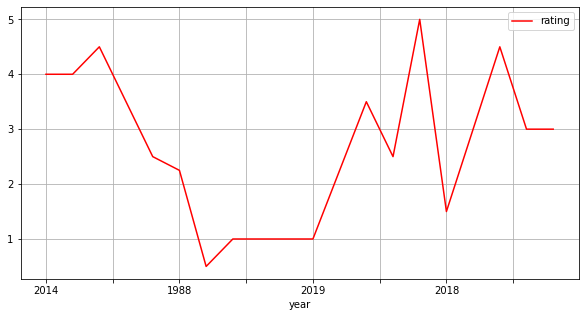

In [25]:
# takings our whole data set
join_datasets[-20:].plot(x='year', y='rating', figsize=(10,5), grid=True , color = 'r')

In [26]:
# taking average of the year
average_year = join_datasets[['year','rating']].groupby('year', as_index=False).mean()

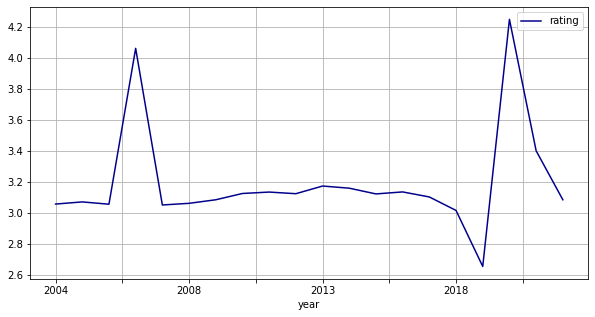

In [27]:
average_year[-20:].plot(x='year', y='rating', figsize=(10,5), grid=True , color='DarkBlue')

                           Fig : Average Movie Ratings over Time 